In [3]:
# Import libraries
import pandas as pd
import numpy as np

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import matplotlib
from matplotlib import pyplot as plt
showfig = False

In [8]:
X1 = pd.read_csv("X1.csv")
Y1 = pd.read_csv("Y1.csv",header=None,names =['shares'])

if showfig:
    fig = plt.figure(figsize=(6.4*2,4.8*6))
    gs  = fig.add_gridspec(nrows=12, ncols=5)
    for (i,header) in enumerate(X1.columns):
        ax = fig.add_subplot(gs[int(i/5),i%5])
        ax.scatter(X1[header],Y1.values, s=5)
        ax.set_xlabel(header)
    fig.tight_layout()

X1_val = X1.values
Y1_val = Y1.values

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_val, Y1_val,random_state=1, test_size=0.2)

In [5]:
# Prediction
def scoref1(ytrue, ypred, th):
    return sklearn.metrics.f1_score(ytrue>th, ypred>th)

def scoreregression(ytrue, ypred):
    scores = [
        scoref1(ytrue, ypred, th=th) for th in [ 500, 1400, 5000, 10000]
    ]
    return np.mean(scores)

In [66]:
def linear_regression(X1, Y1):

    #select features
    data = np.concatenate((np.transpose(X1),np.transpose(Y1)))
    corr = np.corrcoef(data)
    ind = np.argpartition(corr[:][58], -4)[-4:]
    features = np.zeros((19822,3))

    tracker = 0
    for i in ind[0:-1]:
        features[:,tracker] = X1[:, i]
        tracker +=1

    X1_train_corr, X1_test_corr, Y1_train_corr, Y1_test_corr = train_test_split(features, Y1_val,random_state=1, test_size=0.2)

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X1_train_corr, Y1_train_corr)

    # Make predictions using the testing set
    Y1_pred = regr.predict(X1_test_corr)
    
    print(scoreregression(Y1_test_corr, Y1_pred))
    

In [67]:
linear_regression(X1_val, Y1_val)

0.4746420107120262


Minimum number of components that preserve 0.95 of the variance = 36 



Text(0, 0.5, 'Preserved variance')

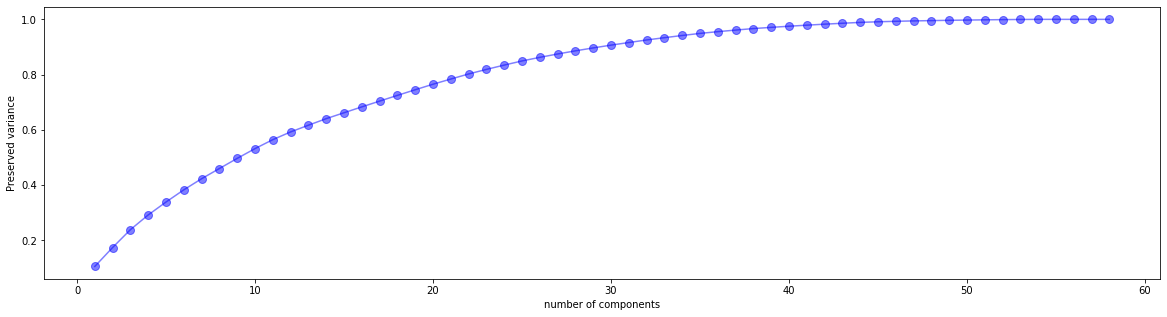

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# To do 1: initiate StandardScaler class
scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
X1_normalized = scaler.fit_transform(X1_train)
X1_ = X1_normalized.copy()

# Initialize PCA
pca = PCA(n_components=X1.shape[-1])
pca.fit_transform(X1_, Y1_train)

data_transformed = pca.fit_transform(X1_normalized)
eig_val = pca.explained_variance_
eig_vec = pca.components_

# Compute an array E, where E(P) indicates the variance captured in the first P component.
E = np.array([eig_val[:p+1].sum()/eig_val.sum() for p in range(len(eig_val))])
tau = 0.95 # Threshold

# Find the minimum P that captures \tau portion of the variance
P = np.where(E>tau)[0][0] +1

print('Minimum number of components that preserve {} of the variance = {} \n' .format(tau,P))
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot() #(131)
ax1.plot(np.arange(1,E.shape[0]+1), E, 'o-', markersize=8, color='blue', alpha=0.5)
ax1.set_xlabel('number of components')
ax1.set_ylabel('Preserved variance')

In [68]:
pca.n_components = 20
X1_train_pca = pca.fit_transform(X1_, Y1_train)
X1_test_pca  = pca.fit_transform(
                scaler.fit_transform(X1_test))

In [69]:
#https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X1_train_pca, Y1_train)

Y1_pred=reg.predict(X1_test_pca)

print(scoreregression(Y1_test, Y1_pred))

0.46527108981351617
